In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
# import string
# from string import punctuation
# from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif
from sklearn.utils import shuffle
from scipy.stats import pearsonr

! pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
# from sklearn import svm

# nltk.download('stopwords')
# from nltk.stem import WordNetLemmatizer
# from nltk import ngrams

import re
import string

! pip install nltk
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

! pip install tensorflow

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
import io
import json
from collections import Counter

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
analysis_set = pd.read_csv("csv's/AnalysisDataset.csv")

In [48]:
reviews = analysis_set["cleanedText"]
reviews = reviews.apply(lambda x: re.sub(r"\s+", " ", str(x)).strip() if isinstance(x, (str, float, int)) else x)

In [49]:
unseen_reviews = []
for review in reviews:
    unseen_reviews.append(review)

In [50]:
with open('embedded.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [51]:
unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_reviews)
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [52]:
from keras.models import load_model

model_path = 'lstm_model.keras'
pretrained_lstm_model = load_model(model_path)
pretrained_lstm_model.summary()
preds = pd.Series()
preds = pretrained_lstm_model.predict(unseen_padded)
# unseen_sentiments

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     6,029,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,381,833 (24.34 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 6,029,700 (23.00 MB)

 Optimizer params: 234,756 (917.02 KB)

43426/43426 ━━━━━━━━━━━━━━━━━━━━ 661s 15ms/step


In [53]:
preds = (preds > 0.5).astype(int).flatten()

In [54]:
analysis_set["predictedSentiment"] = preds
analysis_set.head(1)

,Unnamed: 0,category,brand,item,rating,cleanedText,text_length,timestamp,numRating,average_rating,total_votes,predictedSentiment
0,0,All Beauty,herbivore,Herbivore - Natural Sea Mist Texturizing Salt ...,5.0,spray really nice smell really good go really ...,61,1588687728923,384.0,4.3,0,1


In [55]:
analysis_set.to_csv("csv's/Predictions.csv")

In [90]:
df = pd.DataFrame()
df = pd.read_csv("csv's/Predictions.csv")

In [91]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,category,brand,item,rating,cleanedText,text_length,timestamp,numRating,average_rating,total_votes,predictedSentiment
0,0,0,All Beauty,herbivore,Herbivore - Natural Sea Mist Texturizing Salt ...,5.0,spray really nice smell really good go really ...,61,1588687728923,384.0,4.3,0,1
1,1,1,All Beauty,two goat apothecary,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,product need wish odorless soft coconut smell ...,47,1588615855070,56.0,4.0,1,0
2,2,2,All Beauty,new road beauty,New Road Beauty - Creamsicle - Variety 3 Pack ...,5.0,smell good feel great,4,1589665266052,699.0,4.4,2,1


In [130]:
df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'], unit= 'ms')
df.loc[:, 'month'] = df['timestamp'].dt.month
df.loc[:, 'year'] = df['timestamp'].dt.year

In [131]:
# cps_vals = {}

In [132]:
# alpha = 0.7
# beta = 0.25
# gamma = 0.05

In [133]:
for category in df['category'].unique():
    category_data = df[df['category']==category].copy()

    ## Trying to separate categories into their months now
    
    for year in category_data['year'].unique():
        for month in category_data['month'].unique():
            category_by_year_month = category_data[(category_data["year"]==year) & (category_data["month"]==month)]
            
            if not category_by_year_month.empty:
                monthly_total_reviews = category_by_year_month["numRating"].sum()
                monthly_total_average_rating = category_by_year_month["average_rating"].sum()
                monthly_total_votes = category_by_year_month["total_votes"].sum()


                # cps = ((alpha * monthly_total_reviews) +
                #         (beta * monthly_total_average_rating) +
                #         (gamma * monthly_total_votes))
                
                # cps_vals[(category, year, month)] = cps

In [134]:
# df.loc[:, 'CPS'] = df.apply(
#     lambda row: cps_vals.get((row['category'], row['year'], row['month']), 0),
#     axis=1
# )

In [135]:
# cps_summary = pd.DataFrame([(cat, yr, mo, val) 
#                            for (cat, yr, mo), val in cps_vals.items()],
#                            columns=['category', 'year', 'month', 'CPS'])

In [136]:
# cps_summary = cps_summary.sort_values(['year', 'month', 'category'])

In [137]:
# cps_summary["CPS"] = np.log(cps_summary["CPS"] + 1)
# min_val = cps_summary["CPS"].min()
# max_val = cps_summary["CPS"].max()
# cps_summary["CPS scaled"] = 0 + (cps_summary["CPS"] - min_val) * (100 - 0) / (max_val - min_val)

In [138]:
# df["CPS"] = np.log(df["CPS"] + 1)
# min_val = df["CPS"].min()
# max_val = df["CPS"].max()
# df["CPS scaled"] = 0 + (df["CPS"] - min_val) * (100 - 0) / (max_val - min_val)

In [139]:
# cps_summary

# Grouped months by their mean popularity scores

In [140]:
# popularity_by_month = df.groupby(['category', 'month'])['popularity_score'].mean().div(1000).round(2).reset_index()

In [141]:
# def get_top_categories_by_month(month_num):
#     # Filter for the specific month
#     month_data = popularity_by_month[popularity_by_month['month'] == month_num]
    
#     # Sort by popularity_score in descending order and take top 5
#     top_categories = month_data.sort_values('popularity_score', ascending=False).head(3)
    
#     return top_categories

In [142]:
# top_categories_by_month = {}
# month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
#               'July', 'August', 'September', 'October', 'November', 'December']

In [143]:
# for i in range(1, 13):
#     top_categories = get_top_categories_by_month(i)
#     top_categories_by_month[month_names[i-1]] = top_categories

In [144]:
# result_df = pd.DataFrame()

# for month_name, top_data in top_categories_by_month.items():
#     if not top_data.empty:
#         # Add month name as a column
#         top_data_with_month = top_data.copy()
#         top_data_with_month['month_name'] = month_name
        
#         # Append to result DataFrame
#         result_df = pd.concat([result_df, top_data_with_month])

In [145]:
# final_result = result_df[['month', 'month_name', 'category', 'popularity_score']].sort_values(
#     by=['month', 'popularity_score'], 
#     ascending=[True, False]
# )

In [146]:
# final_result.drop(columns=["month"], inplace=True)
# final_result

In [147]:
# df = pd.read_csv("csv's/Predictions.csv")

In [148]:
df['timestamp']= pd.to_datetime(df['timestamp'])
df['month']= df['timestamp'].dt.month

In [ ]:
df.to_csv("csv's/FinalPredictions.csv")

In [149]:
group= df.groupby(['category', 'month']).agg(totalReviews=('predictedSentiment', 'count'), positive=('predictedSentiment', 'sum')).reset_index()

In [150]:
group['ratio']= group['positive'] / group['totalReviews']
group['ratio']= group['ratio'].round(2)
# group

In [151]:
groupMonth= group.pivot(index= 'category', columns= 'month', values= 'totalReviews').fillna(0)
groupRatio= group.pivot(index= 'category', columns= 'month', values= 'ratio').fillna(0)

In [152]:
months= range(1, 13) #1 -> 12
month_names= ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

#reindexs to make category not the index anymore
groupMonth= groupMonth.reindex(columns= months, fill_value= 0.0).astype(float)
groupRatio= groupRatio.reindex(columns= months, fill_value= 0).astype(float)

In [153]:
totalRatio= pd.concat([
    groupMonth.rename(columns= dict(zip(months, [f"{i}_Total"for i in month_names]))),
    groupRatio.rename(columns= dict(zip(months, [f"{i}_Ratio"for i in month_names])))
], axis= 1)

In [154]:
columnOrder= []
for i in month_names:
    columnOrder.extend([f"{i}_Total", f"{i}_Ratio"])

In [155]:
totalRatio= totalRatio[columnOrder].reset_index()

In [156]:
totalCols= [col for col in totalRatio.columns if '_Total' in col]
totalRatio[totalCols]= totalRatio[totalCols].astype(int)

In [169]:
totalRatio
totalRatio.to_csv("csv's/TotalRatio.csv")

# Visualization for all categories and their popularity over the months

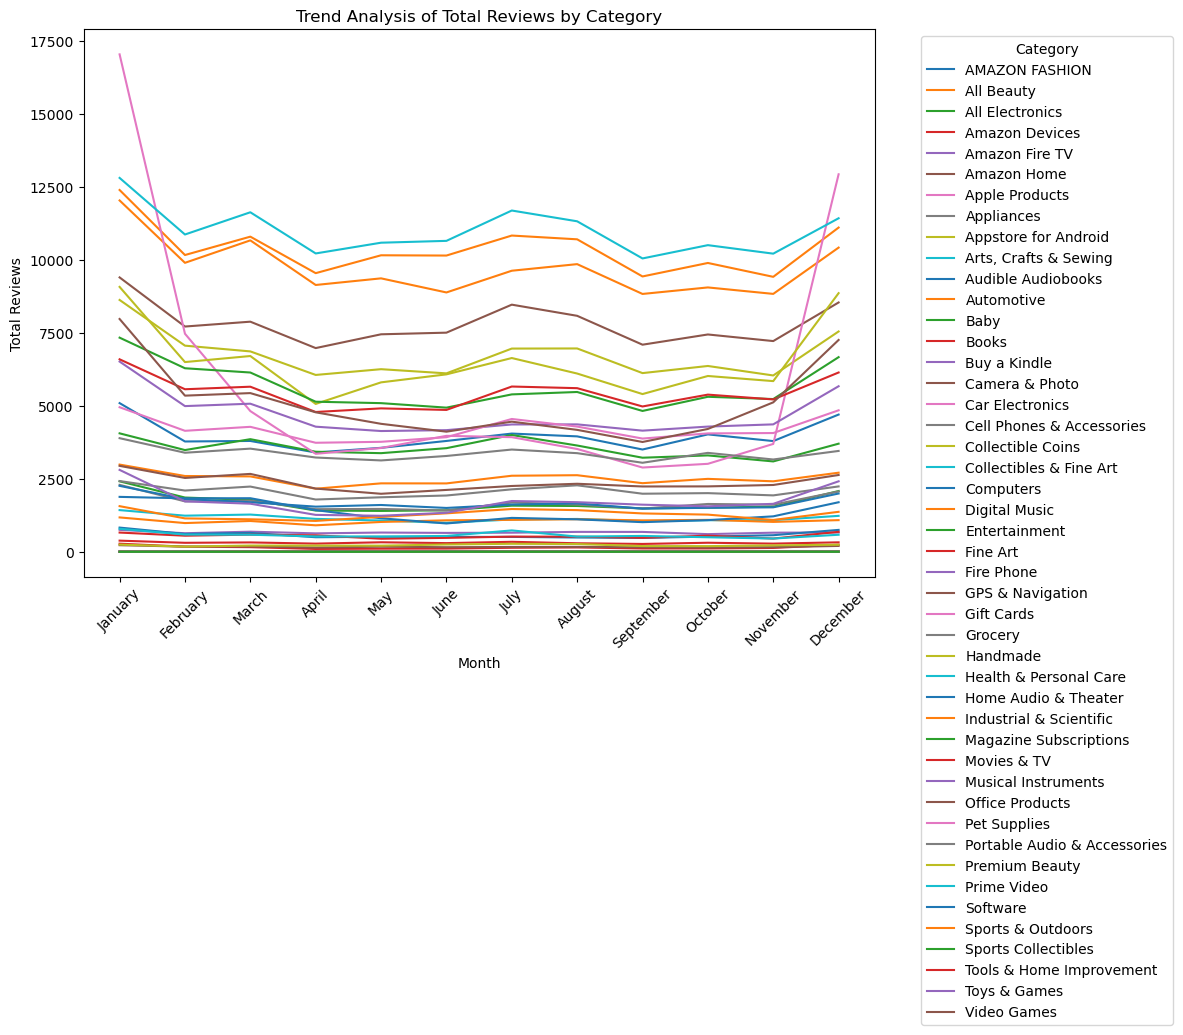

In [158]:
#get total columns
totalCols = [col for col in totalRatio.columns if '_Total' in col]

#melt the frame
melted= totalRatio.melt(id_vars='category', value_vars=totalCols, var_name='Month', value_name='TotalReviews')

melted['Month'] = melted['Month'].str.replace('_Total', '')
melted['Month'] = pd.Categorical(melted['Month'], categories=month_names, ordered=True)

#plot 
plt.figure(figsize=(12, 9))
for category in melted['category'].unique():
    category_data = melted[melted['category'] == category]
    plt.plot(category_data['Month'], category_data['TotalReviews'], label=category)

#supposed to get the max value but it dont work :\
# max_point = category_data.loc[category_data['TotalReviews'].idxmax()]
# plt.text(max_point['Month'], max_point['TotalReviews'], category, fontsize=9, ha='center', va='bottom')

plt.title('Trend Analysis of Total Reviews by Category')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for single category popularity

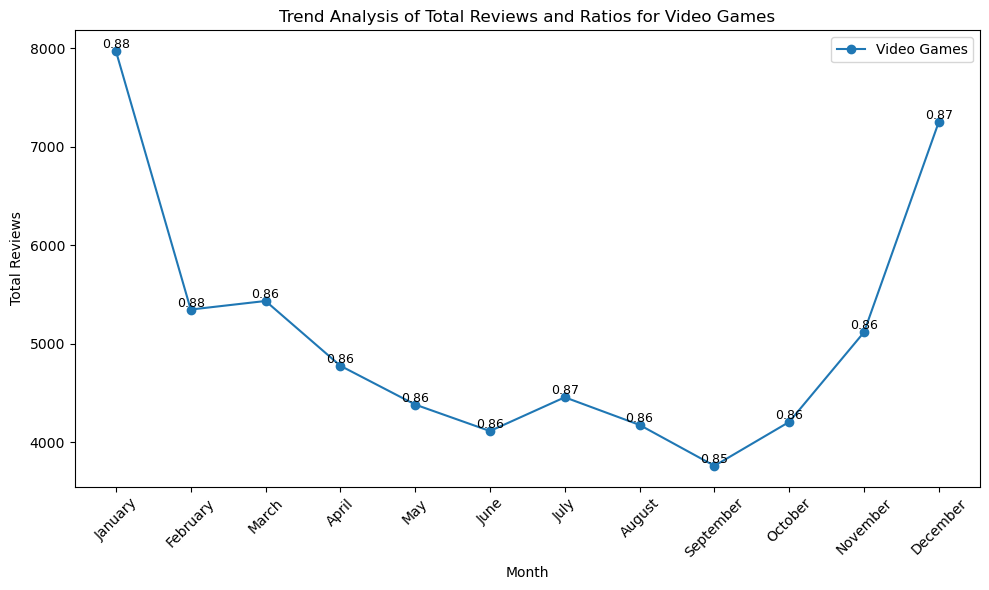

In [159]:
# #The category you want to plot
# selected= "Video Games"

# #melt frame
# category_data = melted[melted['category'] == selected]

# #Plot
# plt.figure(figsize=(10, 6))
# plt.plot(category_data['Month'], category_data['TotalReviews'], marker='o', label=selected)


# plt.title(f'Trend Analysis of Total Reviews for {selected}')
# plt.xlabel('Month')
# plt.ylabel('Total Reviews')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

#chosen category
selected = "Video Games"

#get the columns for each (WHY IS IT SO COMPLICTED TO GET THE DAMN RATIO TO SHOW)
total_review_cols = [col for col in totalRatio.columns if '_Total' in col]
ratio_cols = [col for col in totalRatio.columns if '_Ratio' in col]

# grab the categories from the categories frame
category_data = totalRatio[totalRatio['category'] == selected]

#melt frames to have each set of data
melted_reviews = category_data.melt(id_vars='category', value_vars=total_review_cols, var_name='Month', value_name='TotalReviews')
melted_ratios = category_data.melt(id_vars='category', value_vars=ratio_cols, var_name='Month', value_name='Ratio')

#fix column names
melted_reviews['Month'] = melted_reviews['Month'].str.replace('_Total', '')
melted_ratios['Month'] = melted_ratios['Month'].str.replace('_Ratio', '')

#merge em back in
melted_data = pd.merge(melted_reviews, melted_ratios, on=['category', 'Month'])

#plot
plt.figure(figsize=(10, 6))
plt.plot(melted_data['Month'], melted_data['TotalReviews'], marker='o', label=selected)

#finally put the damn ratios
for i, row in melted_data.iterrows():
    plt.text(row['Month'], row['TotalReviews'], f"{row['Ratio']:.2f}", fontsize=9, ha='center', va='bottom')

plt.title(f'Trend Analysis of Total Reviews and Ratios for {selected}')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [160]:
#dataframe for brand information
brandTotal= df.groupby(['category', 'brand', 'month']).agg(totalReviews=('predictedSentiment', 'count'), positive=('predictedSentiment', 'sum')).reset_index()

brandTotal['ratio']= (brandTotal['positive'] / brandTotal['totalReviews']).round(2)

#pivot for reviews and ratios
brandMonth= brandTotal.pivot(index= ['category', 'brand'], columns= 'month', values= 'totalReviews').fillna(0)
brandRatio= brandTotal.pivot(index= ['category', 'brand'], columns= 'month', values= 'ratio').fillna(0)

#concat frames
# brandFinal= pd.concat(
#     [brandMonth.add_suffix('_Total'), brandRatio.add_suffix('_Ratio')]
# , axis= 1).reset_index()
brandFinal= pd.concat([
    brandMonth.rename(columns= dict(zip(months, [f"{i}_Total"for i in month_names]))),
    brandRatio.rename(columns= dict(zip(months, [f"{i}_Ratio"for i in month_names])))
], axis= 1)

# columnOrder= []
# for i in month_names:
#     columnOrder.extend([f"{i}_Total", f"{i}_Ratio"])

brandFinal= brandFinal[columnOrder].reset_index()

totalCols= [col for col in brandFinal.columns if '_Total' in col]
brandFinal[totalCols]= brandFinal[totalCols].astype(int)

# #sort by category
# brandTotal= brandTotal.sort_values(by=['category'])

brandFinal.head(1)

month,category,brand,January_Total,January_Ratio,February_Total,February_Ratio,March_Total,March_Ratio,April_Total,April_Ratio,...,August_Total,August_Ratio,September_Total,September_Ratio,October_Total,October_Ratio,November_Total,November_Ratio,December_Total,December_Ratio
0,AMAZON FASHION,aamilife,1,1.0,0,0.0,1,1.0,1,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,1,1.0


# Visualization for top 10 brands in a category and their popularity

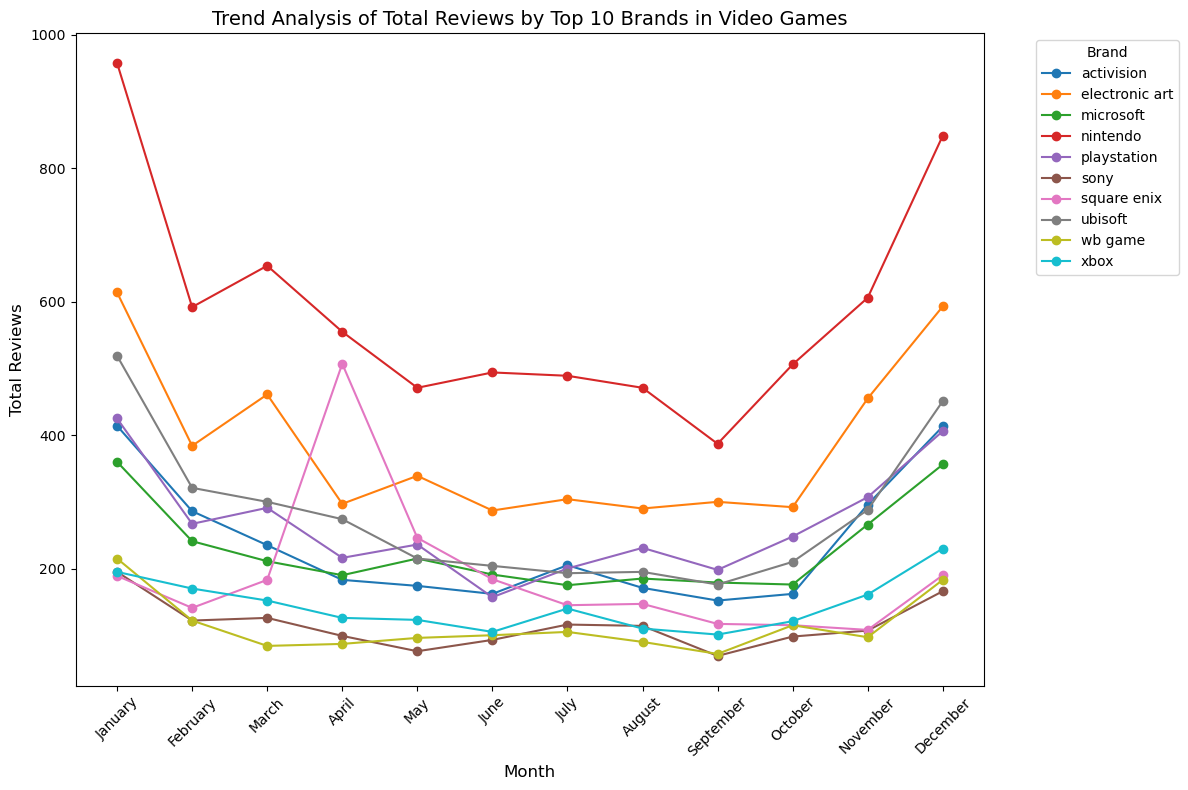

In [161]:
selected= "Video Games"

#Filter for brand
category_brands = brandTotal[brandTotal['category'] == selected]

#get total reviews for brands
brand_totals = category_brands.groupby('brand')['totalReviews'].sum().reset_index()

#Get the top 10
top_brands = brand_totals.nlargest(10, 'totalReviews')['brand']

#Filter the original frame to only include top 10 
top_brands_data = category_brands[category_brands['brand'].isin(top_brands)]

#repivot data
brand_monthly_reviews = top_brands_data.pivot(index='brand', columns='month', values='totalReviews').fillna(0)

#plot
plt.figure(figsize=(12, 8))
for brand in brand_monthly_reviews.index:
    plt.plot(brand_monthly_reviews.columns, brand_monthly_reviews.loc[brand], marker='o', label=brand)

plt.title(f'Trend Analysis of Total Reviews by Top 10 Brands in {selected}', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization of Two Brands Side by Side

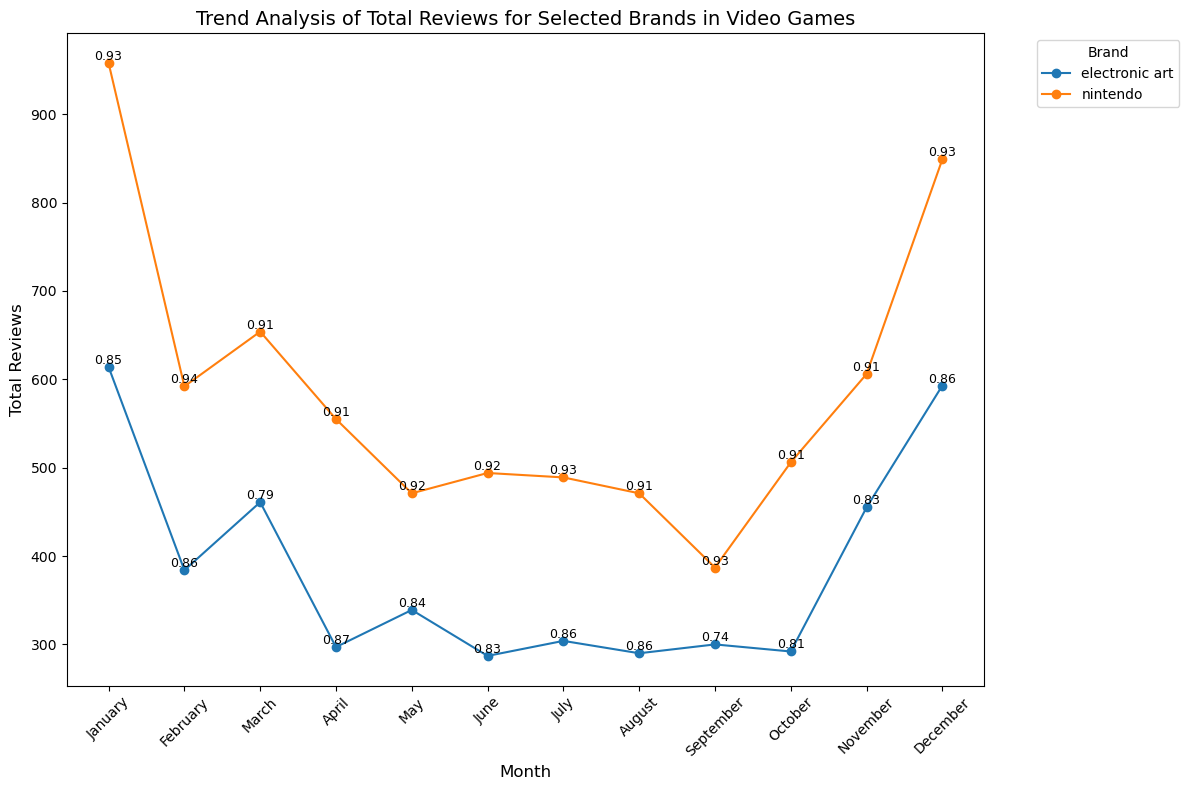

In [162]:
selected_category = "Video Games"  # Replace with the actual category name
selected_brands = ["nintendo", "electronic art"]  # Replace with the actual brand names

# Filter the DataFrame for the selected category and brands
category_brands = brandTotal[(brandTotal['category'] == selected_category) & 
                             (brandTotal['brand'].isin(selected_brands))]

# Pivot the data to have months as columns for totalReviews
brand_monthly_reviews = category_brands.pivot(index='brand', columns='month', values='totalReviews').fillna(0)
brand_monthly_ratios = category_brands.pivot(index='brand', columns='month', values='ratio').fillna(0)

# Plot the trend for the selected brands
plt.figure(figsize=(12, 8))
for brand in brand_monthly_reviews.index:
    plt.plot(brand_monthly_reviews.columns, brand_monthly_reviews.loc[brand], marker='o', label=brand)

    for month in brand_monthly_reviews.columns:
        total_reviews = brand_monthly_reviews.loc[brand, month]
        ratio = brand_monthly_ratios.loc[brand, month]
        plt.text(month, total_reviews, f"{ratio:.2f}", fontsize=9, ha='center', va='bottom')

# Add labels and title
plt.title(f'Trend Analysis of Total Reviews for Selected Brands in {selected_category}', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [163]:
df

,Unnamed: 0.1,Unnamed: 0,category,brand,item,rating,cleanedText,text_length,timestamp,numRating,average_rating,total_votes,predictedSentiment,month,year
0,0,0,All Beauty,herbivore,Herbivore - Natural Sea Mist Texturizing Salt ...,5.0,spray really nice smell really good go really ...,61,2020-05-05 14:08:48.923,384.0,4.3,0,1,5,2020
1,1,1,All Beauty,two goat apothecary,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,product need wish odorless soft coconut smell ...,47,2020-05-04 18:10:55.070,56.0,4.0,1,0,5,2020
2,2,2,All Beauty,new road beauty,New Road Beauty - Creamsicle - Variety 3 Pack ...,5.0,smell good feel great,4,2020-05-16 21:41:06.052,699.0,4.4,2,1,5,2020
3,3,3,All Beauty,muaowig,muaowig Ombre Body Wave Bundles 1B Grey Human ...,1.0,felt synthetic,2,2022-01-28 18:13:50.220,1.0,1.0,0,0,1,2022
4,4,4,All Beauty,yinhua,Yinhua Electric Nail Drill Kit Portable Profes...,5.0,love,2,2020-12-30 10:02:43.534,20.0,3.5,0,1,12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389608,1389608,1429480,Toys & Games,nintendo,"Nintendo Official Super Mario Luigi Plush, 8""",4.0,smaller thought kept anyway,9,2017-01-11 00:23:54.000,654.0,4.6,0,0,1,2017
1389609,1389609,1429481,Video Games,sony computer entertainment,Spyro 2: Ripto's Rage,5.0,spyro two greatest ever long playthrough fun s...,22,2019-08-08 19:56:40.022,486.0,4.6,0,1,8,2019
1389610,1389610,1429482,Video Games,sega,Soccer Slam - Gamecube,5.0,love game,3,2022-06-19 20:24:21.742,26.0,4.1,0,1,6,2022
1389611,1389611,1429483,Video Games,nintendo,Mario Kart: Double Dash,5.0,love game,3,2022-05-17 18:32:24.004,1315.0,4.5,0,1,5,2022


# Correlation between review length and sentiment

Pearson correlation coefficient: 0.0355
P-value: 0.0000


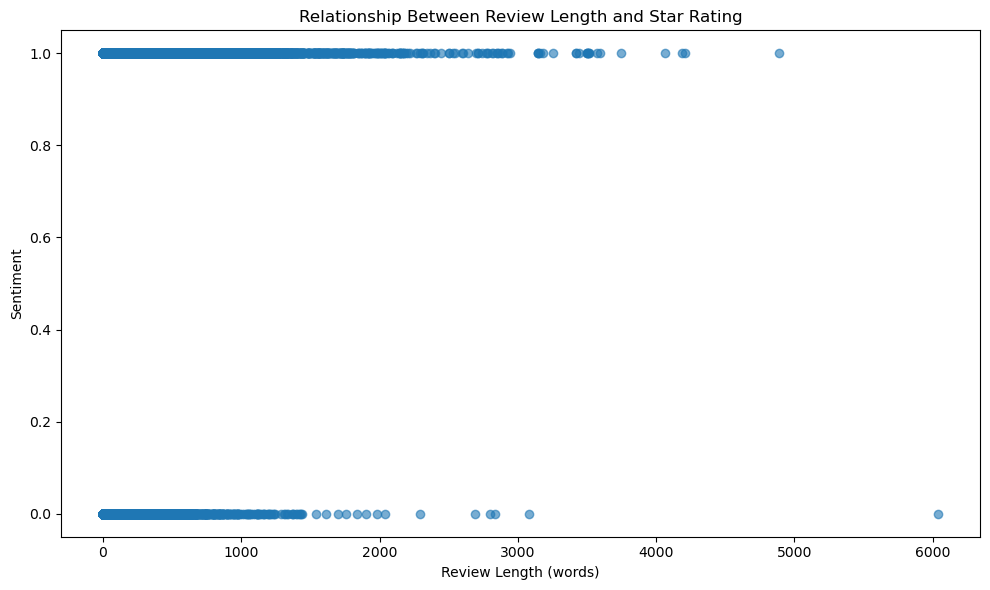

In [164]:
correlation, p_value = pearsonr(df['text_length'], df['predictedSentiment'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")



plt.figure(figsize=(10, 6))
plt.scatter(df['text_length'], df['predictedSentiment'], alpha=0.6)
plt.title('Relationship Between Review Length and Star Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Sentiment')


# plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}\nP-value: {p_value:.4f}', 
#          transform=plt.gca().transAxes, fontsize=12, 
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Getting positive features for a chosen brand

In [165]:
def extract_positive_features(text):
    if isinstance(text, str):
        tokens= word_tokenize(text)
        pos_tags= pos_tag(tokens)
        phrases= []
        for i in range(len(pos_tags) - 1):
            word, tag = pos_tags[i]
            next_word, next_tag = pos_tags[i + 1]
            # Check for adjective followed by a noun
            if tag in ['JJ', 'JJR', 'JJS'] and next_tag in ['NN', 'NNS', 'NNP', 'NNPS']:
                phrases.append(f"{word} {next_word}")
        return phrases
    return []

In [166]:
# # Specify the categories you want to analyze
# selected_categories = ["Video Games"]  # Replace with your desired categories

# # Filter the DataFrame for the specific categories
# category_df = df[df['category'].isin(selected_categories)]

# # Apply the extract_positive_features function to the cleanedText column
# category_df['positive_features'] = category_df['cleanedText'].apply(extract_positive_features)

# # Group by category and flatten the list of phrases for each category
# category_features = {}
# for category in selected_categories:
#     category_data = category_df[category_df['category'] == category]
#     all_phrases = [phrase for phrases in category_data['positive_features'] for phrase in phrases]
#     category_features[category] = Counter(all_phrases).most_common(10)

# # Display the most common positive features for each category
# for category, features in category_features.items():
#     print(f"Top positive features for {category}:")
#     for feature, count in features:
#         print(f"  - {feature}: {count} occurrences")
#     print()  # Add a blank line for better readability

In [167]:

selected_category= "Video Games"  
selected_brand= "bethesda"      


stop_phrases= {"great game", "good", "game", "best game", "nice game", "fun game", 
                "good game", "amazing game", "awesome game", "favorite game", "love game"}


def filter_stop_phrases(phrases):
    return [phrase for phrase in phrases if phrase.lower() not in stop_phrases]

#filter the frame
brand_features= df[(df['category']== selected_category)& (df['brand']== selected_brand)]

#get positive features and block stop phrases
brand_features['positive_features']= brand_features['cleanedText'].apply(extract_positive_features)
brand_features['positive_features']= brand_features['positive_features'].apply(filter_stop_phrases)

#flatten list
all_phrases= [phrase for phrases in brand_features['positive_features'] for phrase in phrases]
phrase_counts= Counter(all_phrases)

#print features
print(f"Top positive features for {selected_brand} in {selected_category}:")
for feature, count in phrase_counts.most_common(10):
    print(f"  - {feature}: {count} occurrences")
print()

Top positive features for bethesda in Video Games:
  - single player: 33 occurrences
  - open world: 19 occurrences
  - long time: 17 occurrences
  - old school: 15 occurrences
  - much fun: 15 occurrences
  - first person: 14 occurrences
  - original doom: 12 occurrences
  - first time: 11 occurrences
  - bad guy: 11 occurrences
  - video game: 10 occurrences



C:\Users\saeed\AppData\Local\Temp\ipykernel_23024\3820501952.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_features['positive_features']= brand_features['cleanedText'].apply(extract_positive_features)
C:\Users\saeed\AppData\Local\Temp\ipykernel_23024\3820501952.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_features['positive_features']= brand_features['positive_features'].apply(filter_stop_phrases)
